In [1]:
import pandas as pd
import matplotlib.pylab as plt
import random
import numpy as np
from matplotlib import cm
import seaborn as sns
import math

In [2]:
df = pd.read_csv("ex2data1_.txt", header=None, dtype=float, names=['x1', 'x2', 'y'])
df.insert(0, 'x0', 1)

In [3]:
df.head()

,x0,x1,x2,y
0,1,34.623660,78.024693,0.0
1,1,30.286711,43.894998,0.0
2,1,35.847409,72.902198,0.0
3,1,60.182599,86.308552,1.0
4,1,79.032736,75.344376,1.0


In [4]:
dataMatrix = df.values
X, y = dataMatrix[:,:-1], dataMatrix[:,-1]

<AxesSubplot:xlabel='x1', ylabel='x2'>

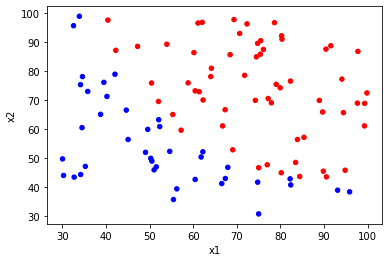

In [5]:
df.plot.scatter(x='x1',y='x2',c=df.y.map({0:'b', 1:'r'}))

In [6]:
def J(X, y, theta):
    sigmoida = 1 / (1 + np.exp(-np.matmul(theta, X.T)))
    return ((-y*np.log(sigmoida) - (1-y)*np.log(1-sigmoida)).mean())

def linear(x,theta):
    return (-theta[0] - theta[1]*x) / theta[2] 

def quadratic(x,theta):
    return (-theta[0] - theta[1]*x - theta[3]*(x**2)) / theta[2] 

def dJ(bX, by, theta):
    sigmoida = 1 / (1 + np.exp(-np.matmul(theta, bX)))
    return (sigmoida-by) @ bX.T * (1 / len(by))

def standardization(dataMatrix, X):
    dataMatrix = X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    return dataMatrix, X

In [7]:
dataMatrix[:,1:3], X[:,1:3] = standardization(dataMatrix[:,1:3], X[:,1:3])

In [8]:
dataMatrix[:5, :]

array([[ 1.        , -1.60224763,  0.63834112,  0.        ],
       [ 1.        , -1.82625564, -1.2075414 ,  0.        ],
       [ 1.        , -1.53903969,  0.3612943 ,  0.        ],
       [ 1.        , -0.28210129,  1.0863683 ,  1.        ],
       [ 1.        ,  0.69152826,  0.49337794,  1.        ]])

In [9]:
random.seed()
m = 5
theta = np.random.rand(1,3)
a = 0.05
mses = []

for step in range(300):
    for i in range(math.ceil(len(X)/m)): 
        bX = X[i*m:i*m+m,:]
        by = y[i*m:i*m+m]
        theta -= a * dJ(bX.T, by, theta)
        d = J(X, y, theta)
        mses.append(d)

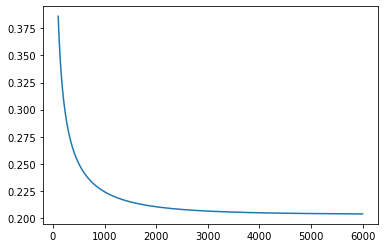

In [10]:
plt.plot(pd.DataFrame(mses).rolling(100).mean())

In [11]:
theta

array([[1.61643867, 3.76255883, 3.50498982]])

In [12]:
J(X, y, theta)

0.203839587466729

In [13]:
x1 = np.linspace(np.min(X[:,1]), np.max(X[:,1]), num=50)
y1 = [linear(x,theta[0]) for x in x1]

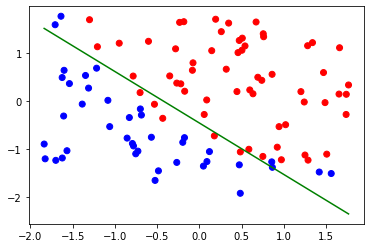

In [14]:
plt.scatter(x=X[:,1],y=X[:,2],c=df.y.map({0:'b', 1:'r'}))
plt.plot(x1, y1, color='green')

In [15]:
X1 = np.hstack((dataMatrix[:,0:-1],dataMatrix[:,1:2]**2))
dataMatrix = np.hstack((X1,dataMatrix[:, -1:]))

In [16]:
X, y = dataMatrix[:, 0:-1], dataMatrix[:, -1]
random.seed()
m = 7
theta = np.random.rand(1,4)
a = 0.1
mses = []

for step in range(2100):
    for i in range(math.ceil(len(X)/m)): 
        bX = X[i*m:i*m+m,:]
        by = y[i*m:i*m+m]
        theta -= a * dJ(bX.T, by, theta)
        d = J(X, y, theta)
        mses.append(d)

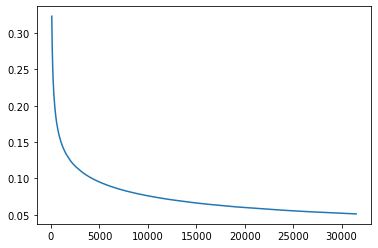

In [17]:
plt.plot(pd.DataFrame(mses).rolling(80).mean())

In [18]:
theta

array([[10.37827956, 11.31243533, 12.22382957, -5.38549868]])

In [19]:
J(dataMatrix[:,0:-1], dataMatrix[:, -1], theta)

0.05104920566443985

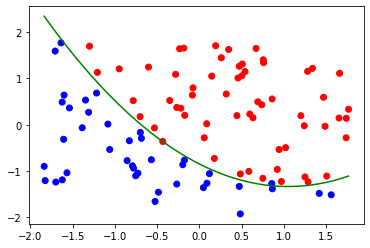

In [20]:
x1 = np.linspace(np.min(X1[:,1]), np.max(X1[:,1]), num=50)
y1 = [ quadratic(x,theta[0]) for x in x1]

plt.scatter(x=X[:,1],y=X[:,2],c=df.y.map({0:'b', 1:'r'}))
plt.plot(x1, y1, color='green')